# Question: If you have data from the UK biobank of 10,000 South Asian individuals, how will you go about isolating nutritional phenotype information and performing further analysis?

Answer:

The broad steps to isolate nutritional phenotype data from UK biobank are as follows:

1.Identify the variables in the UK Biobank dataset that relate to nutrition, such as dietary intake, nutrient levels, or anthropometric measures related to nutrition 

2. Filter the dataset to only include data for South Asian individuals

3. Explore the dataset to understand the distribution of variables and check for missing values

4.  Perform statistical analyses to investigate relationships between the nutritional variables and other variables of interest, such as demographic information, health outcomes, or genetic variants

5. Use data visualization tools to communicate findings and insights from the analysis

To filter the dataset in the UK Biobank to only include data for South Asian individuals, you can use either self-reported ethnicity or genetic ancestry data. 

# First Method: Self-reported ethnicity

First, Let create a simulated dataset 

In [38]:
#import libraries
import numpy as np
import pandas as pd

In [39]:
# Set the number of individuals in the dataset
num_individuals = 10800

In [40]:
# Generate the ID variable
ids = np.arange(1, num_individuals+1)

# Generate the Age variable (mean=50, std=10)
ages = np.random.normal(loc=50, scale=10, size=num_individuals).astype(int)

# Generate the Sex variable (M or F)
sexes = np.random.choice(['M', 'F'], size=num_individuals)

# Generate the Height variable (mean=170, std=10)
heights = np.random.normal(loc=170, scale=10, size=num_individuals).round(1)

# Generate the Weight variable (mean=70, std=10)
weights = np.random.normal(loc=70, scale=10, size=num_individuals).round(1)

#Generate the ethnicity variable
ethnicity = np.random.choice(["Indian", "Pakistani", "Bangladeshi", "Asian", "Chinese", "white_british", "white_irish"], size=num_individuals)

# Generate the Systolic Blood Pressure variable (mean=120, std=10)
sbp = np.random.normal(loc=120, scale=10, size=num_individuals).astype(int)

# Generate the Diastolic Blood Pressure variable (mean=80, std=10)
dbp = np.random.normal(loc=80, scale=10, size=num_individuals).astype(int)

#Generate calorie_intake variable (mean =1000, std = 500)
calorie = np.random.normal(loc=1000, scale=500,size=num_individuals).astype(int)

#Generate protein_intake variable (mean =60, std = 20)
protein = np.random.normal(loc=60, scale=20,size=num_individuals).astype(int)

#Generate carb_intake variable (mean =200, std = 70)
carb = np.random.normal(loc=200, scale=70,size=num_individuals).astype(int)

#Generate fat_intake variable (mean =80, std = 25)
fat = np.random.normal(loc=80, scale=25,size=num_individuals).astype(int)

# Generate the Smoking Status variable (Current Smoker, Former Smoker, or Non-Smoker)
smoking_status = np.random.choice(['Current Smoker', 'Former Smoker', 'Non-Smoker'], size=num_individuals)

# Generate the Alcohol Intake variable (mean=20, std=10)
alcohol_intake = np.random.normal(loc=20, scale=10, size=num_individuals).astype(int)

# Generate the Physical Activity variable (mean=3, std=2)
physical_activity = np.random.normal(loc=3, scale=2, size=num_individuals).round(1)

# Generate the Diabetes Status variable (Yes or No)
diabetes_status = np.random.choice(['Yes', 'No'], size=num_individuals)

# Generate the Cancer Status variable (Yes or No)
cancer_status = np.random.choice(['Yes', 'No'], size=num_individuals)


In [41]:
# Create a dictionary with the variables
data_dict = {'ID': ids,
             'Age': ages,
             'Sex': sexes,
             'Height_cm': heights,
             'Weight_kg': weights,
             'Ethnicity': ethnicity,
             'Systolic_BP_mmHg': sbp,
             'Diastolic_BP_mmHg': dbp,
             'Calorie_intake': calorie,
             'Protein_intake': protein,
             'Carb_intake': carb,
             'Fat_intake': fat,
             'Smoking_Status': smoking_status,
             'Alcohol_Intake_g/day': alcohol_intake,
             'Physical_Activity_hours/week': physical_activity,
             'Diabetes_Status': diabetes_status,
             'Cancer_Status': cancer_status}

In [42]:
# Convert the dictionary to a Pandas DataFrame
df = pd.DataFrame(data_dict)

In [43]:
# Save the DataFrame to a tab-delimited text file
df.to_csv('simulated_uk_biobank_dataset.txt', sep='\t', index=False)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10800 non-null  int32  
 1   Age                           10800 non-null  int32  
 2   Sex                           10800 non-null  object 
 3   Height_cm                     10800 non-null  float64
 4   Weight_kg                     10800 non-null  float64
 5   Ethnicity                     10800 non-null  object 
 6   Systolic_BP_mmHg              10800 non-null  int32  
 7   Diastolic_BP_mmHg             10800 non-null  int32  
 8   Calorie_intake                10800 non-null  int32  
 9   Protein_intake                10800 non-null  int32  
 10  Carb_intake                   10800 non-null  int32  
 11  Fat_intake                    10800 non-null  int32  
 12  Smoking_Status                10800 non-null  object 
 13  A

Identify the variable in the UK Biobank dataset that contains information on self-reported ethnicity. 

This variable may be labeled "ethnicity," "ethnic group," or similar.

Filter the dataset to only include individuals who self-reported as South Asian in this variable. The exact category labels may vary depending on the UK Biobank dataset, but could include "Indian," "Pakistani," "Bangladeshi," or similar.

In [48]:
asian_df = df.loc[(df["Ethnicity"] == "Indian")|(df["Ethnicity"]=="Pakistani")|(df["Ethnicity"]=="Bangladeshi")| (df["Ethnicity"]=="Asian")]

In [46]:
asian_df['Ethnicity'].value_counts()

Bangladeshi    1612
Indian         1532
Asian          1507
Pakistani      1498
Name: Ethnicity, dtype: int64

Further can check for distribution, outliers and missing values in the data

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Height_cm'}>],
       [<AxesSubplot:title={'center':'Weight_kg'}>,
        <AxesSubplot:title={'center':'Systolic_BP_mmHg'}>,
        <AxesSubplot:title={'center':'Diastolic_BP_mmHg'}>],
       [<AxesSubplot:title={'center':'Calorie_intake'}>,
        <AxesSubplot:title={'center':'Protein_intake'}>,
        <AxesSubplot:title={'center':'Carb_intake'}>],
       [<AxesSubplot:title={'center':'Fat_intake'}>,
        <AxesSubplot:title={'center':'Alcohol_Intake_g/day'}>,
        <AxesSubplot:title={'center':'Physical_Activity_hours/week'}>]],
      dtype=object)

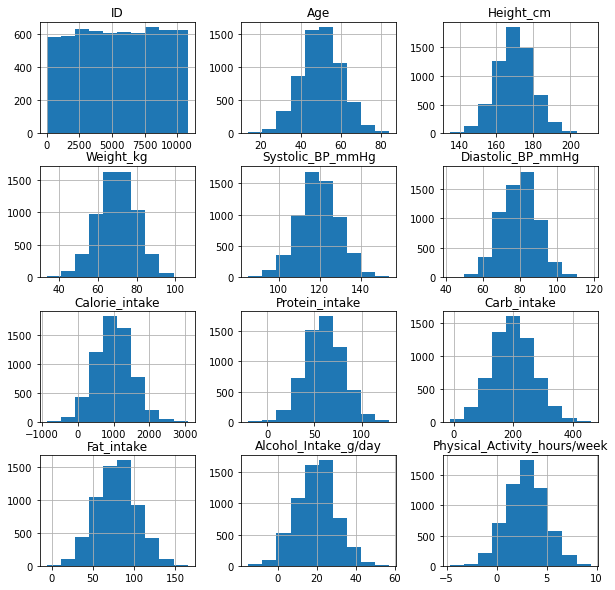

In [49]:
# Check the distribution of each column in the asian_black_df dataframe
asian_df.hist(figsize=(10,10))

In [51]:
# Check for missing values in the asian_black_df dataframe
asian_df.isnull().sum()

ID                              0
Age                             0
Sex                             0
Height_cm                       0
Weight_kg                       0
Ethnicity                       0
Systolic_BP_mmHg                0
Diastolic_BP_mmHg               0
Calorie_intake                  0
Protein_intake                  0
Carb_intake                     0
Fat_intake                      0
Smoking_Status                  0
Alcohol_Intake_g/day            0
Physical_Activity_hours/week    0
Diabetes_Status                 0
Cancer_Status                   0
dtype: int64

In [61]:
# Check for outliers using the interquartile range (IQR) method
Q1 = asian_df.quantile(0.25)
Q3 = asian_df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((asian_df < (Q1 - 1.5 * IQR)) | (asian_df > (Q3 + 1.5 * IQR))).sum()
print(outliers)

Age                             56
Alcohol_Intake_g/day            57
Calorie_intake                  51
Cancer_Status                    0
Carb_intake                     45
Diabetes_Status                  0
Diastolic_BP_mmHg               57
Ethnicity                        0
Fat_intake                      47
Height_cm                       57
ID                               0
Physical_Activity_hours/week    47
Protein_intake                  45
Sex                              0
Smoking_Status                   0
Systolic_BP_mmHg                60
Weight_kg                       47
dtype: int64


C:\Users\Senthil\AppData\Local\Temp/ipykernel_13032/682632525.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((asian_df < (Q1 - 1.5 * IQR)) | (asian_df > (Q3 + 1.5 * IQR))).sum()


In [62]:
# Drop the rows that contain outliers
outlier_removed_df = asian_df.drop(asian_df.index[outliers])

# Print the cleaned dataframe
print(outlier_removed_df)

          ID  Age Sex  Height_cm  Weight_kg    Ethnicity  Systolic_BP_mmHg  \
3          4   61   F      169.5       70.7    Pakistani               103   
5          6   52   M      192.1       69.7        Asian               118   
7          8   51   M      164.2       82.0  Bangladeshi               116   
9         10   56   M      178.4       67.8    Pakistani                93   
12        13   60   M      172.1       63.6  Bangladeshi               127   
...      ...  ...  ..        ...        ...          ...               ...   
10793  10794   43   M      158.1       63.0  Bangladeshi               120   
10794  10795   66   F      170.3       69.3  Bangladeshi               138   
10796  10797   64   M      176.9       74.6  Bangladeshi               124   
10798  10799   58   M      169.7       90.4        Asian               124   
10799  10800   58   F      181.2       82.4  Bangladeshi               115   

       Diastolic_BP_mmHg  Calorie_intake  Protein_intake  Carb_

In [66]:
outlier_removed_df['Ethnicity'].value_counts()

Bangladeshi    1610
Indian         1530
Asian          1504
Pakistani      1498
Name: Ethnicity, dtype: int64

# Second method: Using genetic ancestry data

1. Identify the variable in the UK Biobank dataset that contains genetic ancestry data. 

2. This variable may be labeled "genetic ancestry," "principal component analysis," or similar.

3.Use a threshold or cutoff to define a South Asian ancestry group based on the genetic data. 

4. This threshold will depend on the specific dataset and the genetic reference panel used to identify ancestry, but could be based on the first few principal components or on specific genetic markers known to be informative for South Asian ancestry.

5. Filter the dataset to only include individuals who meet the cutoff for South Asian ancestry.


In [67]:
#To perform principal component analysis (PCA), import PCA class from the sklearn.decomposition module.
from sklearn.decomposition import PCA

In [69]:
# Set the number of individuals and number of genetic markers in the dataset
num_individuals = 1000
num_markers = 100

In [ ]:
# Generate random genetic data using a normal distribution
genetic_data = np.random.normal(loc=0, scale=1, size=(num_individuals, num_markers))

In [71]:
# Add individual IDs and ethnicities to the genetic data
individual_ids = [f'INDV{i}' for i in range(num_individuals)]
ethnicities = ['South Asian']*500 +['Black']*500
genetic_df = pd.DataFrame(genetic_data, columns=[f'SNP{i}' for i in range(num_markers)])
genetic_df.insert(0, 'Individual ID', individual_ids)
genetic_df.insert(1, 'Ethnicity', ethnicities)

In [75]:
genetic_df.head()

,Individual ID,Ethnicity,SNP0,SNP1,SNP2,SNP3,SNP4,SNP5,SNP6,SNP7,...,SNP90,SNP91,SNP92,SNP93,SNP94,SNP95,SNP96,SNP97,SNP98,SNP99
0,INDV0,South Asian,-0.420986,0.603256,0.011503,0.875060,0.720733,-1.055278,0.881332,0.797337,...,0.609884,0.936943,0.568141,-0.663800,-0.550230,-2.180879,-1.064036,0.692570,-0.262427,1.409297
1,INDV1,South Asian,0.055794,0.063374,0.902475,0.391904,-0.203238,0.321374,-1.440111,-1.535000,...,1.452654,-0.201791,0.431527,0.343122,-1.323319,-0.324317,-0.647156,1.101581,0.633565,-0.028506
2,INDV2,South Asian,-1.033110,-0.101980,-0.939287,1.224047,0.405150,-1.091536,-0.009488,-0.225356,...,1.534972,0.947314,-0.137273,-0.066529,-1.193648,-2.198492,0.386646,-0.188271,-0.225852,-0.262148
3,INDV3,South Asian,0.160735,0.749431,1.031643,-0.742942,1.731911,0.157097,-0.570615,1.322927,...,0.971057,0.358939,0.575040,1.946979,2.034892,-0.224272,0.994981,-0.002077,-1.381373,-1.327766
4,INDV4,South Asian,-0.144983,0.957854,2.216548,-0.838868,1.593306,0.184908,0.117100,-0.775641,...,-1.707968,-0.632083,-0.348463,-0.580776,1.150985,1.601604,0.409621,0.063527,-1.328034,-0.778432


In [76]:
# Perform PCA on the genetic data to create ancestry labels
pca = PCA(n_components=2)
ancestry_labels = pca.fit_transform(genetic_df.iloc[:, 2:])

In [77]:
# Add the ancestry labels to the dataframe
genetic_df['Ancestry Label 1'] = ancestry_labels[:, 0]
genetic_df['Ancestry Label 2'] = ancestry_labels[:, 1]

In [78]:
# Set a threshold cutoff for South Indian ancestry (cut off can vary based on the research Question)
cutoff = -0.2

In [79]:
# Filter out individuals with South Indian ancestry.Individuals with first ancestry label <-0.2 will be filtered out
filtered_df = genetic_df[genetic_df['Ancestry Label 1'] < cutoff]

In [80]:
# Print the filtered dataframe
print(filtered_df)

    Individual ID    Ethnicity      SNP0      SNP1      SNP2      SNP3  \
3           INDV3  South Asian  0.160735  0.749431  1.031643 -0.742942   
6           INDV6  South Asian -1.119025  0.886441 -0.122126 -0.527420   
7           INDV7  South Asian  0.438389 -0.545830 -0.967937 -0.412054   
9           INDV9  South Asian -0.521481  0.594151  2.219753  0.134639   
10         INDV10  South Asian -0.331574 -0.251817  0.136619  0.507722   
..            ...          ...       ...       ...       ...       ...   
985       INDV985        Black  1.758422  0.479449  0.919744 -1.067651   
988       INDV988        Black -1.822631  1.975315  0.405341  1.445654   
989       INDV989        Black -0.174282  0.293556  1.292405 -0.192378   
993       INDV993        Black -0.462286  1.312931 -0.520082 -0.468053   
996       INDV996        Black -0.057451 -0.075869 -0.479785 -0.711480   

         SNP4      SNP5      SNP6      SNP7  ...     SNP92     SNP93  \
3    1.731911  0.157097 -0.570615  1.32